In [124]:
import vertexai
from vertexai.preview.language_models import TextGenerationModel, ChatModel, CodeGenerationModel
import pandas as pd
from google.cloud import bigquery
import db_dtypes
import base64
from pathlib import Path
import matplotlib.pyplot as plt

In [147]:
def main_fun(ques):

    b = ques

    def predict_large_language_model_sample( project_id: str, model_name: str, temperature: float, max_decode_steps: int, top_p: float, top_k: int, content: str, location: str = "us-central1", tuned_model_name: str = "",) :

        """Predict using a Large Language Model."""

        vertexai.init(project=project_id, location=location)

        model = TextGenerationModel.from_pretrained(model_name)

        if tuned_model_name:

          model = model.get_tuned_model(tuned_model_name)

        response = model.predict(content, temperature=temperature, max_output_tokens=max_decode_steps, top_k=top_k, top_p=top_p,)

        #print(f" {response.text}")

        output = response.text
       

        output = output.replace('sql','')
        

        output = output.replace('```','')
        

        return output

        

    data = predict_large_language_model_sample("us-gcp-ame-con-177cf-sbx-1", "text-bison@001", 0, 962, 0.95, 40, f'''return only the executable sql query for this question, {b} in bigquery?  
    
    CREATE TABLE tmna2.tmna2_table (
        business_month INTEGER,
        getsudo_cycle INTEGER,
        division STRING,
        region_code INTEGER,
        region_name STRING,
        region_port_code INTEGER,
        port STRING,
        series_name STRING,
        model_year INTEGER,
        model_number STRING,
        configuration_type STRING,
        configuration_detail STRING,
        ppr1_1x FLOAT,
        ppr2_1x FLOAT,
        ppr3_1x FLOAT,
        target_pipeline_1x FLOAT,
        ppr1_2x FLOAT,
        ppr2_2x FLOAT,
        ppr3_2x FLOAT,
        target_pipeline_2x FLOAT,
        ppr1_guided_2x FLOAT,
        ppr2_guided_2x FLOAT,
        ppr3_guided_2x FLOAT,
        unit_inventory_1x FLOAT,
        inventory_perc_1x FLOAT,
        default_ppr1_pct_1x FLOAT,
        default_ppr2_pct_1x FLOAT,
        default_ppr3_pct_1x FLOAT,
        default_target_pct_1x FLOAT,
        ppr1_firm_forecast_perc_1x FLOAT,
        ppr1_procon_1x FLOAT,
        ppr1_rpdas_request_1x FLOAT,
        ppr2_firm_forecast_perc_1x FLOAT,
        ppr2_rpdas_request_1x FLOAT,
        ppr3_firm_forecast_perc_1x FLOAT,
        ppr3_rpdas_request_1x FLOAT,
        quantity_retail_1x FLOAT,
        quantity_wholesale_1x FLOAT,
        retail_velocity_1x FLOAT,
        sa_ratio_1x FLOAT,
        sales_perc_1x FLOAT,
        suggested_msrp_amt_wholesale_1x FLOAT,
        toms_ppr1_pct_1x FLOAT,
        toms_ppr2_pct_1x FLOAT,
        toms_ppr3_pct_1x FLOAT,
        toms_target_pct_1x FLOAT,
        pred_sales_1x FLOAT,
        ppr1_acceptance INTEGER,
        ppr2_acceptance INTEGER,
        ppr3_acceptance INTEGER,
        target_acceptance INTEGER,
        averall_acceptance INTEGER,
        
    ) 
    
    To calculate overall acceptance rate or Overall acceptance rate, calculate AVG(overall_acceptance) and return the query directly.
    To calculate ppr1 acceptance rate or PPR1 acceptance rate, calculate AVG(ppr1_acceptance) and return the query directly.
    
    To calculate ppr2 acceptance rate or PPR2 acceptance rate, calculate AVG(ppr2_acceptance) and return the query directly.
    To calculate ppr3 acceptance rate or PPR3 acceptance rate, calculate AVG(ppr3_acceptance) and return the query directly.
    To calculate target acceptance rate or Target acceptance rate, calculate average of AVG(target_acceptance) and return the query directly.
    
    To calculate trend for acceptance rate calculate only the overall acceptance rate accross business months and display the query with its business months directly. Don't include series names.
    
    To calculate deviations, perform absolute difference between first column name from the question and second column name from the question. Then apply STDDEV for the absolute difference and return the query directly.
    
    Do upper() only for series names, region names if it was present in the question and return query directly.
    
    Sort the business month in ascending order if the query has business month and return query directly.
    
          
    ''', "us-central1")

    #dict_sql = str(data.to_dict())

    #print(data)
    
    return data
    
    


In [193]:
b = " contribution of Color configuration regionwise as a pie chart "
result = main_fun(b)
print(result)



SELECT 
    region_name,
    SUM(quantity_retail_1x) AS quantity_retail_1x,
    SUM(quantity_wholesale_1x) AS quantity_wholesale_1x
FROM
    tmna2.tmna2_table
WHERE
    configuration_type = 'Color'
GROUP BY
    region_name
ORDER BY
    quantity_retail_1x DESC



In [194]:
def run_sql_query(sql):
    # Create a BigQuery client

    client = bigquery.Client()

        # Get the list of tables in the dataset

    tables = client.list_tables('tmna2')

    results = client.query(sql).to_dataframe()

    return results

In [195]:
result=run_sql_query(result)


In [196]:
print(result)

             region_name  quantity_retail_1x  quantity_wholesale_1x
0               NEW YORK           138173.13              202150.45
1   CEN. ATLANTIC TOYOTA           130244.19              207140.16
2     GULF STATES TOYOTA           129693.13              206159.98
3       SOUTHEAST TOYOTA           129692.97              195256.61
4                WESTERN           129577.38              199714.77
5          SAN FRANCISCO           129340.47              226129.02
6            LOS ANGELES           128807.08              205082.46
7                EASTERN           128255.59              188745.58
8                 DENVER           127977.56              187397.65
9             CINCINNATI           125972.27              199235.56
10                BOSTON           123440.76              205451.54
11              PORTLAND           123235.87              198073.43
12           KANSAS CITY           121776.06              195960.08
13               CHICAGO           119775.04    

In [197]:
type(result)

pandas.core.frame.DataFrame

In [198]:
parameters = {

    "temperature": 0,

    "max_output_tokens": 1024,


}

In [199]:
def plot_code(ans):
    model=CodeGenerationModel.from_pretrained(model_name='code-bison@001')
    instruction = """Given a table load it into a python dataframe named 'df'.
                     Generate a python code using matplotlib to plot the df in a graph with appropriate x and y labels and title.
                     Do not try to read data.
                     Using matplotlib save the plotted graph as plot.png file.
                     \n """
    result=model.predict(f'''{instruction}
                     ans:{ans} ''',**parameters)
    return result
    
    

In [200]:
plot_py=str(plot_code(result))
plot_py=plot_py.replace('```','').replace('python','')

In [201]:
print(plot_py)
with open('./plot_file.py','w+') as f:
    f.write(str(plot_py))

import matplotlib.pyplot as plt
import pandas as pd

# Create a dataframe
df = pd.DataFrame({
    "region_name": ["NEW YORK", "CEN. ATLANTIC TOYOTA", "GULF STATES TOYOTA", "SOUTHEAST TOYOTA", "WESTERN", "SAN FRANCISCO", "LOS ANGELES", "EASTERN", "DENVER", "CINCINNATI", "BOSTON", "PORTLAND", "KANSAS CITY", "CHICAGO", "CENTRAL", "SOUTHERN"],
    "quantity_retail_1x": [138173.13, 130244.19, 129693.13, 129692.97, 129577.38, 129340.47, 128807.08, 128255.59, 127977.56, 125972.27, 123440.76, 123235.87, 121776.06, 119775.04, 117125.42, 116806.00],
    "quantity_wholesale_1x": [202150.45, 207140.16, 206159.98, 195256.61, 199714.77, 226129.02, 205082.46, 188745.58, 187397.65, 199235.56, 205451.54, 198073.43, 195960.08, 205651.61, 201128.23, 201258.05]
})

# Plot the data
plt.plot(df["region_name"], df["quantity_retail_1x"], label="Retail")
plt.plot(df["region_name"], df["quantity_wholesale_1x"], label="Wholesale")

# Set the x and y labels
plt.xlabel("Region Name")
plt.ylabel("Quantity")

# Set 

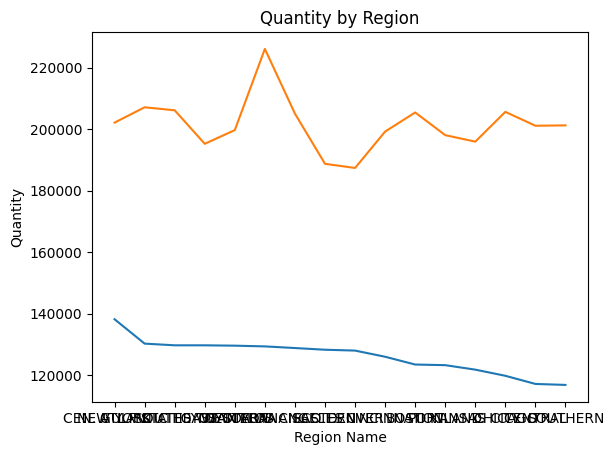

In [202]:
with open("plot_file.py") as f: exec(f.read())

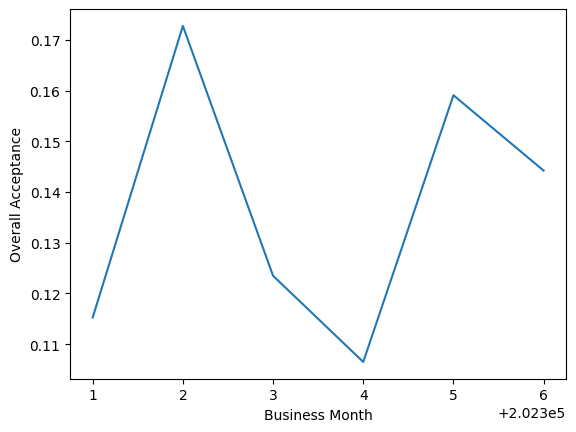

In [106]:
exec(open('plot_file.py').read())

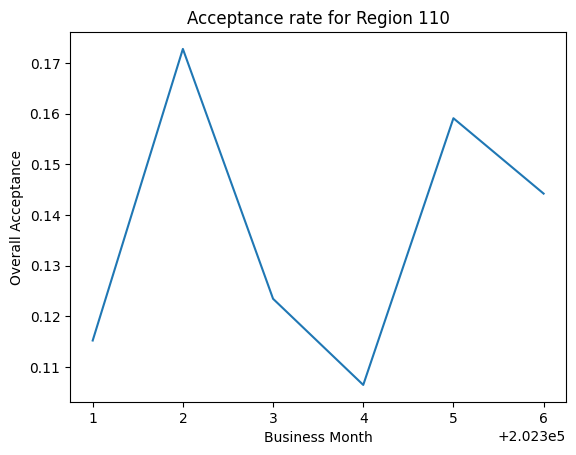

In [160]:
import matplotlib.pyplot as plt

result = pd.DataFrame({'overall_acceptance': [0.115265, 0.172757, 0.123494, 0.106509, 0.159091, 0.144231], 'business_month': [202301, 202302, 202303, 202304, 202305, 202306]})

plt.plot(result['business_month'], result['overall_acceptance'])
plt.title('Acceptance rate for Region 110')
plt.xlabel('Business Month')
plt.ylabel('Overall Acceptance')
plt.show()

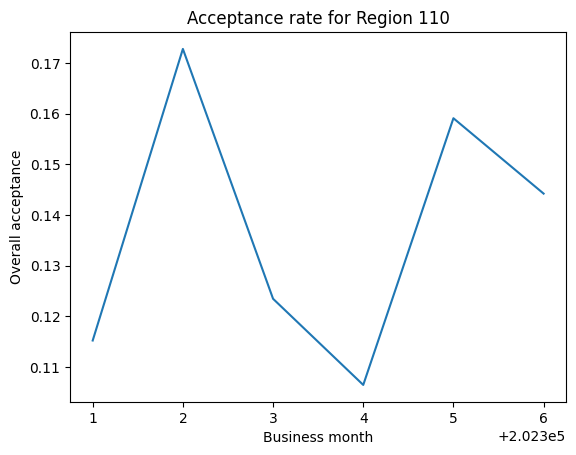

In [151]:
data = result

# Create a plot
plt.plot(data['business_month'], data['overall_acceptance'])

# Add a title
plt.title('Acceptance rate for Region 110')

# Add labels to the axes
plt.xlabel('Business month')
plt.ylabel('Overall acceptance')
# Show the plot
plt.show()

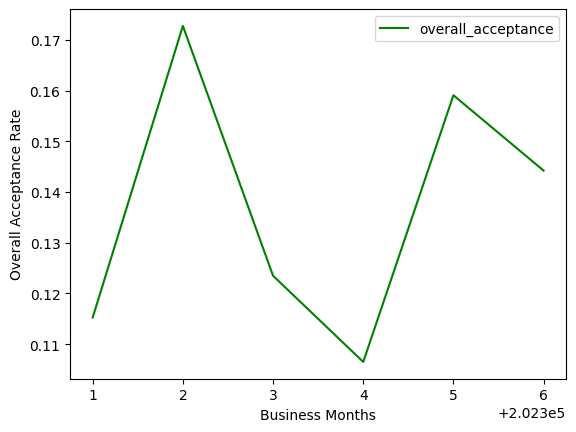

In [119]:

ax = plt.gca()

result.plot(kind='line',
        x='business_month',
        y='overall_acceptance',
        color='green', ax=ax)
ax.set_xlabel("Business Months")
ax.set_ylabel("Overall Acceptance Rate")
plt.show()


In [ ]:
pip install matplotlib
